<a href="https://colab.research.google.com/github/Harika575/prostate_cancer_detection/blob/main/prostate_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy matplotlib

In [ ]:
from google.colab import drive # Corrected the typo from 'deive' to 'drive'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/dataset/prostate_cancer_dataset.zip", 'r') as zip_ref:
  zip_ref.extractall("/content")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 119 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:146: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.4673 - loss: 1.6652 - val_accuracy: 0.4828 - val_loss: 0.7548
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4357 - loss: 0.7584 - val_accuracy: 0.5172 - val_loss: 0.6925
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5613 - loss: 0.6881 - val_accuracy: 0.5862 - val_loss: 0.6935
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5035 - loss: 0.6952 - val_accuracy: 0.4828 - val_loss: 0.6945
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5495 - loss: 0.6917 - val_accuracy: 0.4828 - val_loss: 0.6954
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4875 - loss: 0.6949 - val_accuracy: 0.4828 - val_loss: 0.6941
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5400 - loss: 0.6914 - val_accuracy: 0.5172 - val_loss: 0.6930
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5606 - loss: 0.6913 - val_accuracy: 0.5172 - val_loss: 0.6928
Epoch 9/

Validation Accuracy: 51.72%


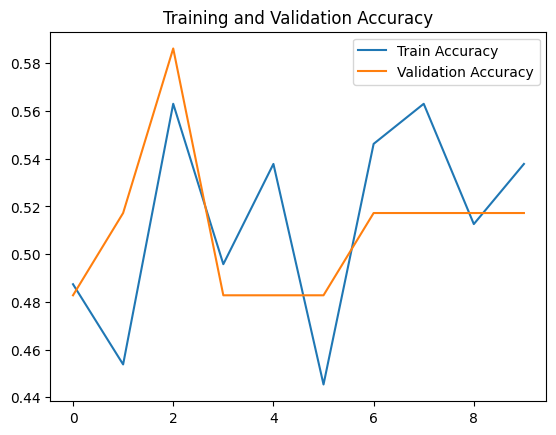

In [ ]:


# Import required libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define dataset path (Modify this based on your Google Drive folder structure)
dataset_path = "/content/Prostate MRI"

# Image parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

# Save the trained model
model.save("/content/drive/My Drive/prostate_mri_model.h5")

# Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


Saving yes.jpg to yes.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


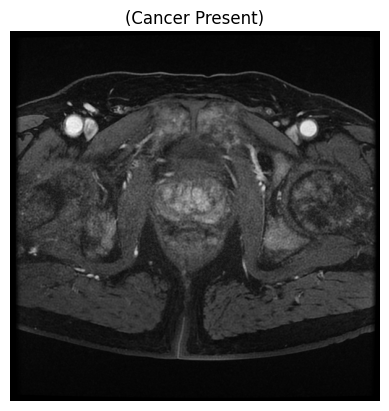

Diagnosis: (Cancer Present)


In [ ]:
# Import required libraries
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model (Ensure this file exists in your Google Drive)
model_path = "/content/drive/My Drive/prostate_mri_model.h5"
model = load_model(model_path)

# Function to preprocess the input image
def preprocess_image(image_path, img_size=224):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (img_size, img_size))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to make a prediction
def predict_cancer(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0][0]  # Get prediction score
    result = "(Cancer Present)" if prediction >= 0.5 else "(No Cancer)"

    # Display Image & Prediction
    plt.imshow(cv2.imread(image_path)[..., ::-1])
    plt.title(result)
    plt.axis("off")
    plt.show()

    return result

# Example Usage: Upload an image from local system
from google.colab import files
uploaded = files.upload()  # Upload MRI Image

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Predict if the image has cancer or not
prediction = predict_cancer(image_path)
print(f"Diagnosis: {prediction}")


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for prostate cancer classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 105s 12s/step - accuracy: 0.5445 - loss: 9.6984 - val_accuracy: 0.5172 - val_loss: 1.8498
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 11s/step - accuracy: 0.5253 - loss: 1.1891 - val_accuracy: 0.4828 - val_loss: 0.8590
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.4770 - loss: 0.9940 - val_accuracy: 0.4828 - val_loss: 0.7749
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.5233 - loss: 0.7846 - val_accuracy: 0.4828 - val_loss: 0.7111
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 10s/step - accuracy: 0.4958 - loss: 0.7065 - val_accuracy: 0.5172 - val_loss: 0.6933
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.5232 - loss: 0.6930 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.5568 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.4998 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931


In [ ]:
import cv2
import numpy as np

def preprocess_mri(image_path, img_size=224):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read MRI in grayscale
    img = cv2.resize(img, (img_size, img_size))  # Resize
    img = cv2.equalizeHist(img)  # Histogram Equalization
    img = cv2.GaussianBlur(img, (3, 3), 0)  # Reduce noise
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Get class weights
# Get unique classes from your data
classes = np.unique(train_data.classes)
class_weights = compute_class_weight('balanced', classes=classes, y=train_data.classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train with class weights
history = model.fit(train_data, validation_data=val_data, epochs=10, class_weight=class_weights_dict)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 263s 10s/step - accuracy: 0.3367 - loss: -4.9638 - val_accuracy: 0.3418 - val_loss: -8.6511
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 274s 11s/step - accuracy: 0.3421 - loss: -5.5817 - val_accuracy: 0.3418 - val_loss: -7.6769
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 237s 10s/step - accuracy: 0.3275 - loss: -9.7778 - val_accuracy: 0.3418 - val_loss: -4.9033
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 237s 10s/step - accuracy: 0.3274 - loss: -5.9202 - val_accuracy: 0.3418 - val_loss: -7.3379
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 238s 10s/step - accuracy: 0.3415 - loss: -15.4338 - val_accuracy: 0.3418 - val_loss: -6.8251
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 301s 11s/step - accuracy: 0.3320 - loss: -18.8144 - val_accuracy: 0.3418 - val_loss: -14.5136
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 277s 11s/step - accuracy: 0.3569 - loss: -11.2152 - val_accuracy: 0.3418 - val_loss: -15.6237
Epoch 8/10
 7/25 ━━━━━━━━━━━━━━━━━━━━ 2:22 8s/step - accuracy: 0.3278 - loss: -18.516

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

# Set image size
IMG_SIZE = 224
BATCH_SIZE = 32

# Load your dataset (Replace with actual dataset path)
def load_images_from_folder(folder):
    images = []
    labels = []

    for label, class_name in enumerate(["benign", "malignant"]):  # 0 = benign, 1 = malignant
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load dataset (Update the path)
dataset_path = "/content/Prostate MRI"
X, y = load_images_from_folder(dataset_path)

# Split dataset (80% Train, 20% Validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.2, shear_range=0.2)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in base_model.layers:
    layer.trainable = False


# Add classification layers
x = base_model.output  # Start with the base model's output
x = Flatten()(x)        # Apply Flatten to the output
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

# Build and compile model
model = Model(inputs=base_model.input, outputs=x)  # Now 'x' is a KerasTensor
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=15,
                    class_weight=class_weights_dict)

# Save trained model
model.save("improved_prostate_mri_model.h5")
print("🎯 Training Complete. Model Saved Successfully!")

# ========== GUI CODE ==========
# Load trained model
model = load_model("improved_prostate_mri_model.h5")

# Function to preprocess image for prediction
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict if cancer is present
def predict_cancer():
    global img_label
    img_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if not img_path:
        return

    # Load and preprocess image
    img = preprocess_image(img_path)
    prediction = model.predict(img)[0][0]

    # Show result in a message box
    result = "Cancer Present" if prediction > 0.5 else "No Cancer Detected"
    messagebox.showinfo("Prediction Result", result)

    # Display selected image
    img = Image.open(img_path)
    img = img.resize((250, 250))
    img = ImageTk.PhotoImage(img)
    img_label.config(image=img)
    img_label.image = img

# Create GUI
root = tk.Tk()
root.title("Prostate MRI Cancer Detector")
root.geometry("400x500")

# Title Label
title_label = tk.Label(root, text="Prostate Cancer Detector", font=("Arial", 16, "bold"))
title_label.pack(pady=10)

# Image Display
img_label = tk.Label(root)
img_label.pack()

# Upload Button
upload_button = tk.Button(root, text="Upload MRI Image", command=predict_cancer, font=("Arial", 12))
upload_button.pack(pady=20)

# Run GUI
root.mainloop()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 11s/step - accuracy: 0.4916 - loss: 0.9528 - val_accuracy: 0.4333 - val_loss: 0.7042
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 11s/step - accuracy: 0.6106 - loss: 0.7510 - val_accuracy: 0.5667 - val_loss: 0.6617
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 11s/step - accuracy: 0.5515 - loss: 0.7694 - val_accuracy: 0.5333 - val_loss: 0.6751
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 12s/step - accuracy: 0.6238 - loss: 0.6964 - val_accuracy: 0.4333 - val_loss: 0.7459
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 9s/step - accuracy: 0.6011 - loss: 0.6890 - val_accuracy: 0.4333 - val_loss: 0.9338
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.5981 - loss: 0.7277 - val_accuracy: 0.4333 - val_loss: 0.9849
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 10s/step - accuracy: 0.6322 - loss: 0.6372 - val_accuracy: 0.4333 - val_loss: 0.9356
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step - accuracy: 0.6254 - loss: 0.6713 - val_accuracy: 0.4333 - val_loss: 0.9669
Ep

🎯 Training Complete. Model Saved Successfully!


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

# Load the trained model (No need to retrain)
MODEL_PATH = "improved_prostate_mri_model.h5"
model = load_model(MODEL_PATH)

# Set image size
IMG_SIZE = 224

# Function to preprocess image for prediction
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict if cancer is present
def predict_cancer():
    global img_label
    img_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if not img_path:
        return

    # Load and preprocess image
    img = preprocess_image(img_path)
    prediction = model.predict(img)[0][0]

    # Show result
    result = "Cancer Present" if prediction > 0.5 else "No Cancer Detected"
    messagebox.showinfo("Prediction Result", result)

    # Display selected image
    img = Image.open(img_path)
    img = img.resize((250, 250))
    img = ImageTk.PhotoImage(img)
    img_label.config(image=img)
    img_label.image = img

# Create GUI
root = tk.Tk()
root.withdraw()
root.title("Prostate MRI Cancer Detector")
root.geometry("400x500")

# Title Label
title_label = tk.Label(root, text="Prostate Cancer Detector", font=("Arial", 16, "bold"))
title_label.pack(pady=10)

# Image Display
img_label = tk.Label(root)
img_label.pack()

# Upload Button
upload_button = tk.Button(root, text="Upload MRI Image", command=predict_cancer, font=("Arial", 12))
upload_button.pack(pady=20)

# Run GUI
root.after(0, predict_cancer)  # Trigger predict_cancer after GUI initialization
root.mainloop()


TclError: couldn't connect to display ":1"

In [ ]:
pip install tensorflow numpy opencv-python pillow


In [ ]:
!python gui_script.py

python3: can't open file '/content/gui_script.py': [Errno 2] No such file or directory


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import os
import cv2
import tkinter as tk
from tkinter import filedialog, messagebox, Entry, Listbox, Scrollbar
from PIL import Image, ImageTk

# Constants
IMG_SIZE = 224
MODEL_PATH = "improved_prostate_mri_model.h5"
SAVED_IMAGES_PATH = "saved_images"  # Folder with sample images

# Load the trained model
if not os.path.exists(MODEL_PATH):
    messagebox.showerror("Error", "Trained model not found! Train the model first.")
    exit()

model = load_model(MODEL_PATH)

# Function to preprocess image for prediction
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        messagebox.showerror("Error", "Invalid image file!")
        return None
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict cancer
def predict_cancer(img_path):
    img = preprocess_image(img_path)
    if img is None:
        return

    prediction = model.predict(img)[0][0]
    result = "Cancer Present" if prediction > 0.5 else "No Cancer Detected"
    messagebox.showinfo("Prediction Result", result)

    # Display image
    img_display = Image.open(img_path)
    img_display = img_display.resize((250, 250))
    img_display = ImageTk.PhotoImage(img_display)
    img_label.config(image=img_display)
    img_label.image = img_display

# Function to upload an image
def upload_image():
    img_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if img_path:
        predict_cancer(img_path)

# Function to use pasted image path
def use_pasted_path():
    img_path = path_entry.get().strip()
    if os.path.exists(img_path):
        predict_cancer(img_path)
    else:
        messagebox.showerror("Error", "Invalid file path!")

# Function to select an image from the side panel
def select_saved_image():
    selected = saved_images_listbox.curselection()
    if not selected:
        return
    img_name = saved_images_listbox.get(selected[0])
    img_path = os.path.join(SAVED_IMAGES_PATH, img_name)
    predict_cancer(img_path)

# Create GUI
root = tk.Tk()
root.title("Prostate MRI Cancer Detector")
root.geometry("500x600")

# Title Label
title_label = tk.Label(root, text="Prostate Cancer Detector", font=("Arial", 16, "bold"))
title_label.pack(pady=10)

# Image Display
img_label = tk.Label(root)
img_label.pack()

# Upload Button
upload_button = tk.Button(root, text="Upload MRI Image", command=upload_image, font=("Arial", 12))
upload_button.pack(pady=10)

# Paste Path Entry
path_label = tk.Label(root, text="Or Paste Image Path:", font=("Arial", 10))
path_label.pack()
path_entry = Entry(root, width=50)
path_entry.pack()
path_button = tk.Button(root, text="Use Path", command=use_pasted_path)
path_button.pack(pady=5)

# Side Panel with Saved Images
saved_images_label = tk.Label(root, text="Select a Sample Image:", font=("Arial", 10))
saved_images_label.pack()

saved_images_listbox = Listbox(root, height=6)
scrollbar = Scrollbar(root)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
saved_images_listbox.config(yscrollcommand=scrollbar.set)
scrollbar.config(command=saved_images_listbox.yview)
saved_images_listbox.pack()

# Load saved images from folder
if os.path.exists(SAVED_IMAGES_PATH):
    images = [f for f in os.listdir(SAVED_IMAGES_PATH) if f.endswith((".jpg", ".png", ".jpeg"))]
    for img in images:
        saved_images_listbox.insert(tk.END, img)
else:
    os.mkdir(SAVED_IMAGES_PATH)

select_button = tk.Button(root, text="Use Selected Image", command=select_saved_image)
select_button.pack(pady=10)

# Run GUI
root.mainloop()


TclError: couldn't connect to display ":1"

In [ ]:
from google.colab import files
files.download("improved_prostate_mri_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install tensorflow numpy opencv-python pillow

In [ ]:
!python gui_script.py

python3: can't open file '/content/gui_script.py': [Errno 2] No such file or directory


In [ ]:
next go to terminal and nur the above code. make sure you have the code in the fire gui_script.py and the model downloded.